In [275]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\kc_house_data.csv
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git\config
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git\description
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git\HEAD
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git\hooks\applypatch-msg.sample
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git\hooks\commit-msg.sample
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git\hooks\fsmonitor-watchman.sample
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git\hooks\post-update.sample
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git\hooks\pre-applypatch.sample
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git\hooks\pre-commit.sample
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\.git

In [276]:
df = pd.read_csv("C:/אריאל נושאי לימוד/מבוא למדעי הנתונים/KAGGLE/house_prices_project/kc_house_data.csv")
df.drop('date', axis=1, inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,1987


# Features

#### id - Unique ID for each home sold.

#### date - Date of the home sale.

#### price - Price of each home sold.

#### bedrooms - Number of bedrooms.

#### bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower.

#### sqft_living - Square footage of the apartments interior living space.

#### sqft_lot - Square footage of the land space.

#### floors - Number of floors.

#### waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not.

#### view - An index from 0 to 4 of how good the view of the property was.

#### condition - An index from 1 to 5 on the condition of the apartment.

#### grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

#### yr_built - The year the house was initially built.

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21613 non-null  int64  
 1   price        21613 non-null  float64
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   sqft_living  21613 non-null  int64  
 5   sqft_lot     21613 non-null  int64  
 6   floors       21613 non-null  float64
 7   waterfront   21613 non-null  int64  
 8   view         21613 non-null  int64  
 9   condition    21613 non-null  int64  
 10  yr_built     21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


In [278]:
df.isnull().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
yr_built       0
dtype: int64

In [279]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

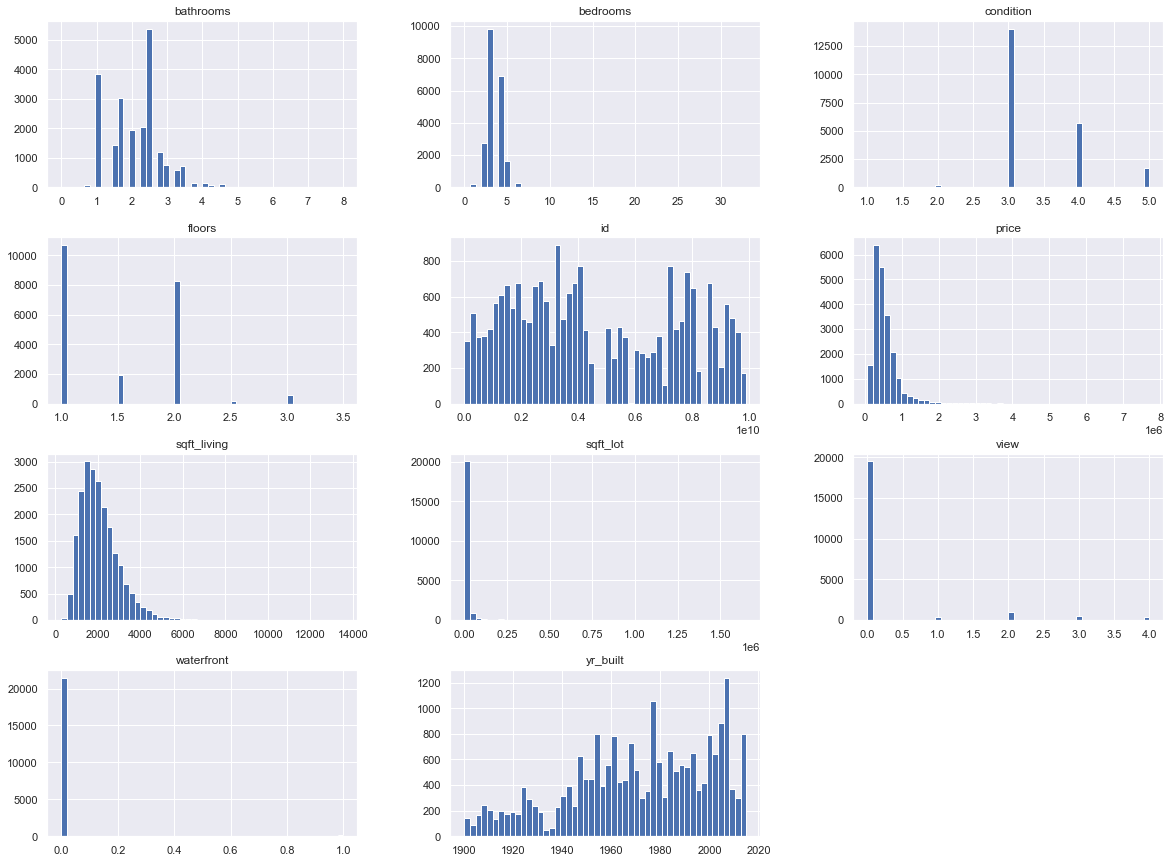

In [280]:
df.hist(bins=50,figsize=(20,15))
plt.show()

## waterfront

In [281]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [282]:
df.groupby(df.waterfront).price.mean()

waterfront
0    5.316534e+05
1    1.662524e+06
Name: price, dtype: float64

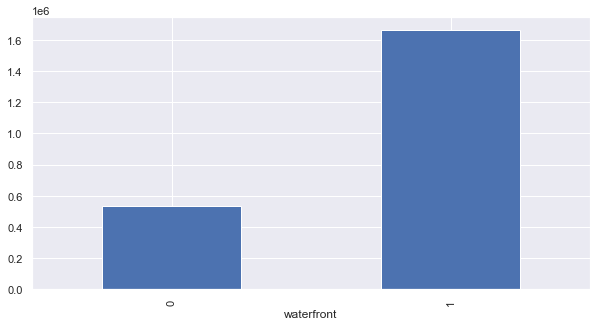

In [283]:
price_by_wf = df.groupby(df.waterfront).price.mean()
price_by_wf.plot(kind='bar',stacked=True ,figsize=(10,5))

a house is either overlooking a waterfront or not, on average a house overlooking a waterfront is worth a million dollars more than a house that's not

## view

In [284]:
df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

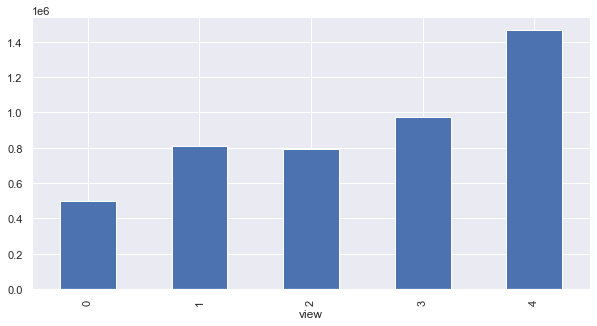

In [285]:
price_by_view = df.groupby(df.view).price.mean()
price_by_view.plot(kind='bar',stacked=True ,figsize=(10,5))

despite the view varible being between 0 and 4 depending on how good it is, the mean price of houses with view value 1 is higher than houses with the view value 2

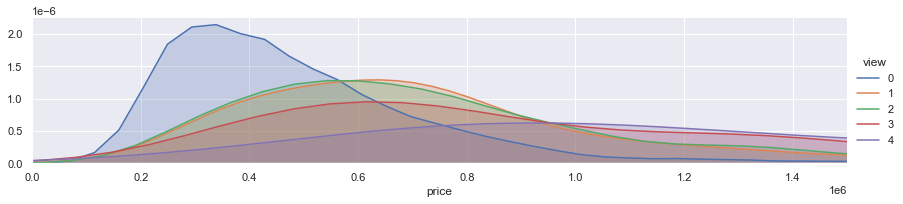

In [286]:
facet = sns.FacetGrid(df, hue="view",aspect=4)
facet.map(sns.kdeplot,'price',shade= True)
facet.set(xlim=(0, df['price'].max()))
facet.add_legend()
plt.xlim(0,1500000)
plt.show()

### another way to look at the price spread for each view value

## floors

In [287]:
df.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [288]:
price_by_floors = df.groupby(df.floors).price.mean()
price_by_floors

floors
1.0    4.422196e+05
1.5    5.590449e+05
2.0    6.490515e+05
2.5    1.061021e+06
3.0    5.826201e+05
3.5    9.339375e+05
Name: price, dtype: float64

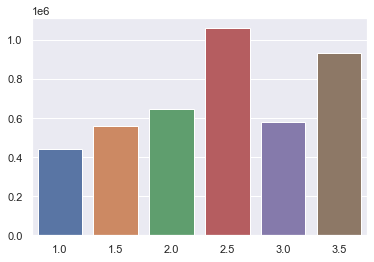

In [289]:
floors = [1,1.5,2,2.5,3,3.5]
mean_price = []
for f in floors:
    mean_price.append(price_by_floors[f])
sns.barplot(floors,mean_price)

## condition

In [290]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [291]:
price_by_condition = df.groupby(df.condition).price.mean()
price_by_condition_ = df.groupby(df.condition).price.median()

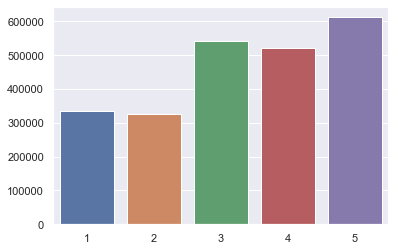

In [292]:
conditions = [1,2,3,4,5]
mean_price_conditions = []
median_price_conditions = []
for c in conditions:
    mean_price_conditions.append(price_by_condition[c])
    median_price_conditions.append(price_by_condition_[c])
sns.barplot(conditions,mean_price_conditions)

average price of a house based on condition value

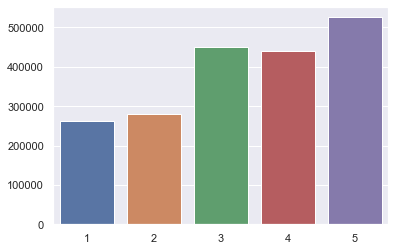

In [293]:
sns.barplot(conditions,median_price_conditions)

median price of a house based on condition value

## year built

In [294]:
df.yr_built.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

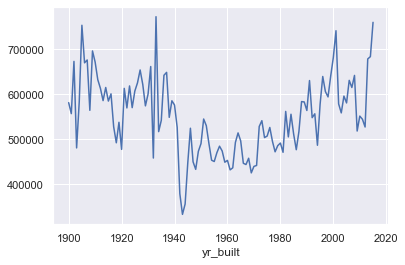

In [295]:
price_by_year_built = df.groupby(df.yr_built).price.mean()
price_by_year_built.plot()

### this feature could be used to create a new feature in the future that has high correlation with the price of the house.
### by itself, the feature is useless because the year built is not a numerical value.

## bedrooms

In [296]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

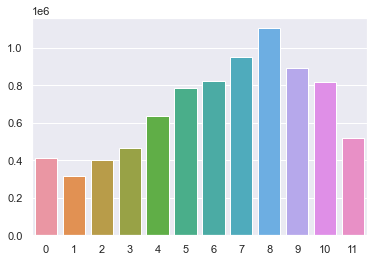

In [297]:
price_by_bedrooms = df.groupby(df.bedrooms).price.mean()

bedroom_count = np.arange(12)

mean_price_by_bedrooms = []

for b in bedroom_count:
    mean_price_by_bedrooms.append(price_by_bedrooms[b])
    
sns.barplot(bedroom_count, mean_price_by_bedrooms)

### there's a pretty linear correlation between the number of bedrooms and the price of the house
### up to 8 bedrooms.

## bathrooms

In [298]:
df.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [299]:
bathroom_count = np.sort(df.bathrooms.unique())
bathroom_count

array([0.  , 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75,
       3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
       5.75, 6.  , 6.25, 6.5 , 6.75, 7.5 , 7.75, 8.  ])

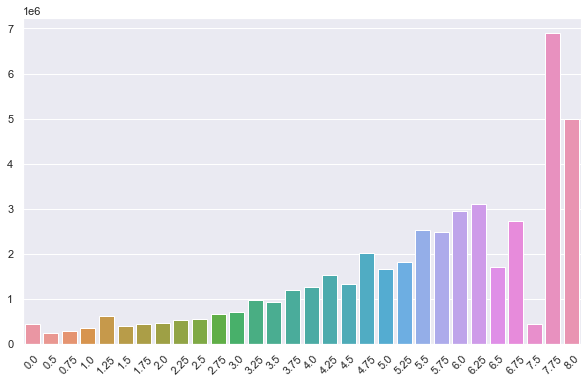

In [300]:
price_by_bathrooms = df.groupby(df.bathrooms).price.mean()

mean_price_by_bathrooms = []

for b in bathroom_count:
    mean_price_by_bathrooms.append(price_by_bathrooms[b])

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)    
    
graph = sns.barplot(bathroom_count, mean_price_by_bathrooms, ax=ax)
for item in graph.get_xticklabels():
    item.set_rotation(45)

## sqft_living

In [301]:
print(df.sqft_living.max())
print(df.sqft_living.min())

13540
290


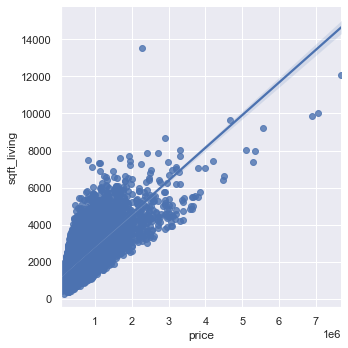

In [302]:
sns.lmplot(x='price',y='sqft_living',data=df)

## sqft_lot

In [303]:
print(df.sqft_lot.max())
print(df.sqft_lot.min())

1651359
520


<Figure size 864x576 with 0 Axes>

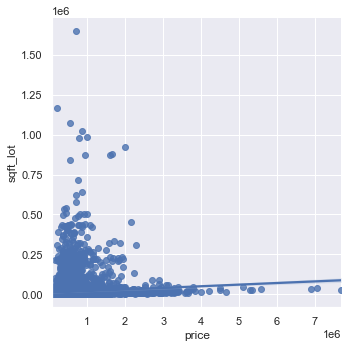

In [304]:
plt.figure(figsize=(12,8))
sns.lmplot(x='price',y='sqft_lot',data=df)

# clean the data

### let's remove some of the unique houses we so from the different graphs

#### we saw there were only 11 house with 9 or more bedrooms, one of them being 33 bedrooms. let's remove them.

In [305]:
df = df[df.bedrooms < 9]

by removing those we also removed the outliers we saw on other graphs

In [306]:
bathroom_count = df.bathrooms.value_counts()
bathroom_count = bathroom_count[bathroom_count < 9]
bathroom_count

6.00    6
0.50    4
5.75    4
8.00    2
6.25    2
6.50    2
6.75    2
7.75    1
Name: bathrooms, dtype: int64

In [307]:
uniqe_bathrooms = [0.5, 5.75, 6, 6.25, 6.5, 6.75, 7.75, 8]

In [308]:
df = df[df['bathrooms'].isin(uniqe_bathrooms) == False]

In [309]:
df.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3047
2.25    2047
2.00    1929
1.50    1446
2.75    1185
3.00     749
3.50     731
3.25     589
3.75     155
4.00     135
4.50      98
4.25      79
0.75      72
4.75      23
5.00      21
5.25      12
0.00      10
5.50      10
1.25       9
Name: bathrooms, dtype: int64

In [310]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,1987


### let's convert each value of every categorial attribute in the dataframe to a column using "get_dummies".

In [311]:
og_df = df.copy()
df = pd.get_dummies(df, columns=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition'])
df

,id,price,sqft_living,sqft_lot,yr_built,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5
0,7129300520,221900.0,1180,5650,1955,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,2570,7242,1951,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,770,10000,1933,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2487200875,604000.0,1960,5000,1965,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,1954400510,510000.0,1680,8080,1987,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,1530,1131,2009,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
21609,6600060120,400000.0,2310,5813,2014,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
21610,1523300141,402101.0,1020,1350,2009,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
21611,291310100,400000.0,1600,2388,2004,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


## finding correlations between the features and the target

#### let's use the correlation matrix to see the correlation between each feature and the price 

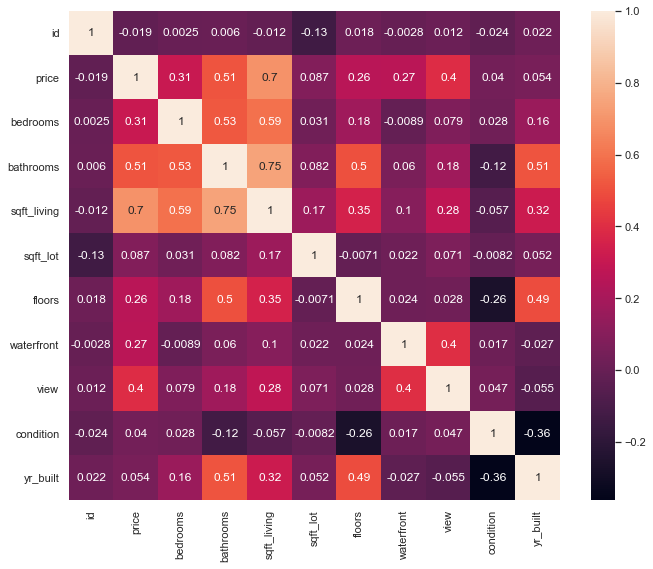

In [313]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
corr = og_df.corr()
sns.heatmap(corr,annot=True)
sns.set(font_scale=1)

### not showing the correlation matrix for the dataframe after the get_dummies function because there are too many features

## correlations for the categorial features

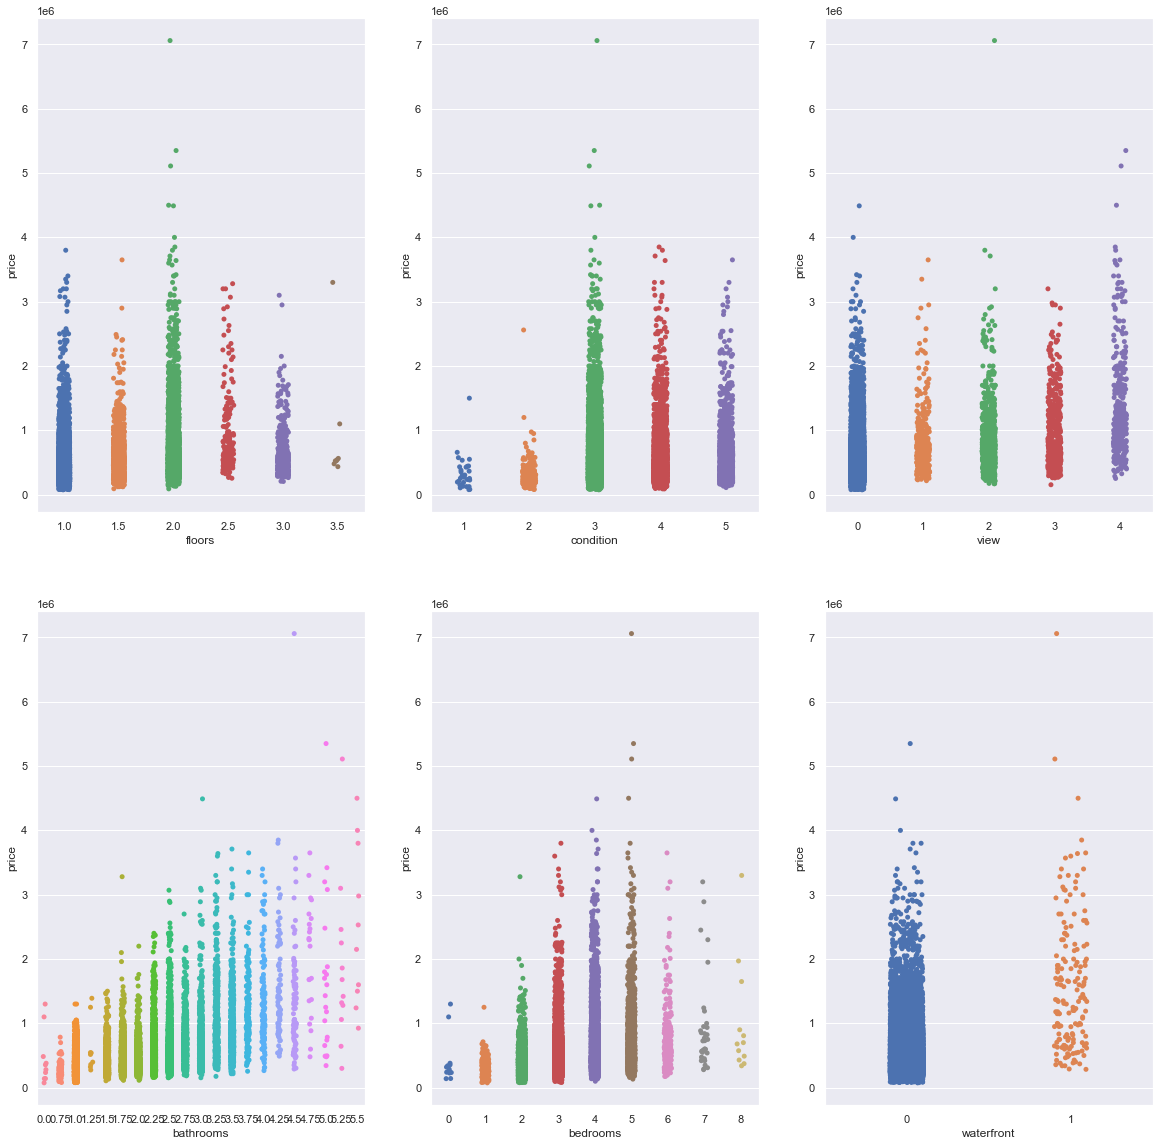

In [349]:
fig, axs = plt.subplots(2, 3, figsize=(20,20))

sns.stripplot(x = "floors", y = "price", data=og_df, ax = axs[0,0])
sns.stripplot(x = "condition", y = "price", data=og_df, ax = axs[0,1])
sns.stripplot(x = "view", y = "price", data=og_df, ax = axs[0,2])
sns.stripplot(x = "bathrooms", y = "price", data=og_df, ax = axs[1,0])
sns.stripplot(x = "bedrooms", y = "price", data=og_df, ax = axs[1,1])
sns.stripplot(x = "waterfront", y = "price", data=og_df, ax = axs[1,2])

In [ ]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

#### in the future will try to create new features based on current features to try and find some strong correlations(total num of rooms, rooms compared to living space)

# models

In [620]:
data = df.drop(["price","id"],axis=1)
prices = df["price"]

In [621]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

lin_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(data, prices, test_size = 0.40, random_state=0)

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lin_reg.fit(X_train,y_train)

y_test_pred = lin_reg.predict(X_test)


In [622]:
import sklearn.metrics as sm
print("Mean absolute error =", sm.mean_absolute_error(y_test, y_test_pred))
print("Mean squared error =", sm.mean_squared_error(y_test, y_test_pred))
print("Median absolute error =", sm.median_absolute_error(y_test, y_test_pred))
print("Explain variance score =", sm.explained_variance_score(y_test, y_test_pred))
print("R2 score =", sm.r2_score(y_test, y_test_pred))

Mean absolute error = 151932.9934332507
Mean squared error = 56216621208.073204
Median absolute error = 108017.08535961842
Explain variance score = 0.6033435424625718
R2 score = 0.6033319265253219


In [623]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, data, prices,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([234993.63762786, 248754.95591509, 220023.01130277, 250722.14031284,
       218267.56805083, 223893.52287778, 222531.32105251, 228688.37936508,
       231604.19262413, 247857.02381328])

In [624]:
scores = cross_val_score(lin_reg, data, prices,
scoring="r2", cv=10)
scores.mean()

0.5951351592317512

array([0.3       , 0.125     , 0.06566038, 0.01059071, 0.        ,
       0.        , 0.        , 0.25      , 0.43478261])